# PJ3

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.colors as mplcolors
import matplotlib.ticker as ptick
import matplotlib.colorbar as mplcolorbar
import matplotlib.cm as mplcm
from matplotlib.ticker import AutoMinorLocator
import math
import Leadangle_wave as Wave
from Leadangle_fit_JunoUVS import eqwlong_err
from Leadangle_fit_JunoUVS import TEB_transit
from Leadangle_fit_JunoUVS import create_argmesh
from column_mass import calc as column_calc
from UniversalColor import UniversalColor
from SharedX import ShareXaxis
from legend_shadow import legend_shadow

UC = UniversalColor()
UC.set_palette()

F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'
F.set_default()

# F.set_figparams()
# F.initialize()

In [8]:
exname = '003/20250516_047'
TARGET_MOON = 'Io'
target_fp = ['MAW', 'TEB']
PJ_num = ['3']
Ai_num = 3
ni_num = 50
Ti_num = 60
Zi = 1.4
Te = 6.0  # [eV]


chi2_1d = np.loadtxt('results/fit/'+exname+'/params_chi2.txt')
Ai_1d = np.loadtxt('results/fit/'+exname+'/params_Ai.txt')
ni_1d = np.loadtxt('results/fit/'+exname+'/params_ni.txt')
Ti_1d = np.loadtxt('results/fit/'+exname+'/params_Ti.txt')
H_1d = np.loadtxt('results/fit/'+exname+'/params_H.txt')
eqlead_est = np.loadtxt('results/fit/'+exname+'/eqlead_est.txt')
eqlead_obs = np.loadtxt('results/fit/'+exname+'/eqlead_obs.txt')
sigma_total = np.loadtxt('results/fit/'+exname+'/sigma_y.txt')
hem_obs = np.loadtxt('results/fit/'+exname+'/hems_obs.txt')
moon_S3wlon_obs = np.loadtxt('results/fit/'+exname+'/moon_S3wlon_obs.txt')
print(chi2_1d.shape)
print(eqlead_est.shape)

chi2_3d_a = chi2_1d.reshape(ni_num, Ai_num, Ti_num)
H_3d_a = H_1d.reshape(ni_num, Ai_num, Ti_num)
Ai_3d_a = Ai_1d.reshape(ni_num, Ai_num, Ti_num)
ni_3d_a = ni_1d.reshape(ni_num, Ai_num, Ti_num)
Ti_3d_a = Ti_1d.reshape(ni_num, Ai_num, Ti_num)
eqlead_est_3d_a = eqlead_est[1].reshape(ni_num, Ai_num, Ti_num)

# 保存されているカイ2乗値は自由度で割ってしまっているので
# ここで元に戻す
chi2_3d_a = chi2_3d_a*(eqlead_est.shape[0]-3)

sigma_obs_a = sigma_total

print('Parameter ranges:')
print('Ai:', np.min(Ai_3d_a), np.max(Ai_3d_a))
print('ni:', np.min(ni_3d_a), np.max(ni_3d_a))
print('Ti:', np.min(Ti_3d_a), np.max(Ti_3d_a))
print('Hi:', np.min(H_3d_a)/71492E+3, np.max(H_3d_a)/71492E+3)
print('Degree of freedom:', (eqlead_est.shape[0]-3))

(9000,)
(44, 9000)
Parameter ranges:
Ai: 20.0 24.0
ni: 499.9999999999999 4999.9999999999945
Ti: 9.999999999999998 999.9999999999999
Hi: 0.5511684557979226 4.543098502123853
Degree of freedom: 41


In [9]:
exname = '003/20250516_165'
TARGET_MOON = 'Io'
target_fp = ['MAW', 'TEB']
PJ_num = ['3']
Ai_num = 3
ni_num = 50
Ti_num = 60
Zi = 1.4
Te = 6.0  # [eV]


chi2_1d = np.loadtxt('results/fit/'+exname+'/params_chi2.txt')
Ai_1d = np.loadtxt('results/fit/'+exname+'/params_Ai.txt')
ni_1d = np.loadtxt('results/fit/'+exname+'/params_ni.txt')
Ti_1d = np.loadtxt('results/fit/'+exname+'/params_Ti.txt')
H_1d = np.loadtxt('results/fit/'+exname+'/params_H.txt')
eqlead_est = np.loadtxt('results/fit/'+exname+'/eqlead_est.txt')
eqlead_obs = np.loadtxt('results/fit/'+exname+'/eqlead_obs.txt')
sigma_total = np.loadtxt('results/fit/'+exname+'/sigma_y.txt')
hem_obs = np.loadtxt('results/fit/'+exname+'/hems_obs.txt')
moon_S3wlon_obs = np.loadtxt('results/fit/'+exname+'/moon_S3wlon_obs.txt')
print(chi2_1d.shape)
print(eqlead_est.shape)

chi2_3d_b = chi2_1d.reshape(ni_num, Ai_num, Ti_num)
H_3d_b = H_1d.reshape(ni_num, Ai_num, Ti_num)
Ai_3d_b = Ai_1d.reshape(ni_num, Ai_num, Ti_num)
ni_3d_b = ni_1d.reshape(ni_num, Ai_num, Ti_num)
Ti_3d_b = Ti_1d.reshape(ni_num, Ai_num, Ti_num)
eqlead_est_3d_b = eqlead_est[1].reshape(ni_num, Ai_num, Ti_num)

# 保存されているカイ2乗値は自由度で割ってしまっているので
# ここで元に戻す
chi2_3d_b = chi2_3d_b*(eqlead_est.shape[0]-3)

sigma_obs = sigma_total

print('Parameter ranges:')
print('Ai:', np.min(Ai_3d_b), np.max(Ai_3d_b))
print('ni:', np.min(ni_3d_b), np.max(ni_3d_b))
print('Ti:', np.min(Ti_3d_b), np.max(Ti_3d_b))
print('Hi:', np.min(H_3d_b)/71492E+3, np.max(H_3d_b)/71492E+3)
print('Degree of freedom:', (eqlead_est.shape[0]-3))

(9000,)
(44, 9000)
Parameter ranges:
Ai: 20.0 24.0
ni: 4999.9999999999945 7500.000000000001
Ti: 9.999999999999998 999.9999999999999
Hi: 0.5511684557979226 4.543098502123853
Degree of freedom: 41


In [10]:
print(Ai_3d_a.shape)
print(Ai_3d_b.shape)

(50, 3, 60)
(50, 3, 60)


In [11]:
column_mass_1dN = np.loadtxt(
    'results/column_mass/003/20250516_'+TARGET_MOON+'/col_massdens_1dN.txt')
column_mass_1dS = np.loadtxt(
    'results/column_mass/003/20250516_'+TARGET_MOON+'/col_massdens_1dS.txt')
column_mass_3dN = column_mass_1dN.reshape(50, 3, 60)
column_mass_3dS = column_mass_1dS.reshape(50, 3, 60)
column_mass_3d_a = column_mass_3dN+column_mass_3dS

In [12]:
column_mass_1dN = np.loadtxt(
    'results/column_mass/003/20250516_'+TARGET_MOON+'_ext2/col_massdens_1dN.txt')
column_mass_1dS = np.loadtxt(
    'results/column_mass/003/20250516_'+TARGET_MOON+'_ext2/col_massdens_1dS.txt')
column_mass_3dN = column_mass_1dN.reshape(50, 3, 60)
column_mass_3dS = column_mass_1dS.reshape(50, 3, 60)
column_mass_3d_b = column_mass_3dN+column_mass_3dS

In [13]:
# %% Constants
dchi_1s = 2.30     # デルタchi2の1シグマ区間
dchi_2s = 6.17     # デルタchi2の2シグマ区間
dchi_3s = 11.8     # デルタchi2の3シグマ区間

MU0 = 1.26E-6            # 真空中の透磁率
AMU2KG = 1.66E-27        # 原子質量をkgに変換するファクタ [kg]
RJ = 71492E+3            # JUPITER RADIUS [m]
MJ = 1.90E+27            # JUPITER MASS [kg]
C = 2.99792E+8           # LIGHT SPEED [m/s]
G = 6.67E-11             # 万有引力定数  [m^3 kg^-1 s^-2]

Psyn_io = (12.89)*3600      # Moon's synodic period [sec]
Psyn_eu = (11.22)*3600      # Moon's synodic period [sec]
Psyn_ga = (10.53)*3600      # Moon's synodic period [sec]

if TARGET_MOON == 'Io':
    Psyn = Psyn_io
    r_moon = 5.9*RJ
    xticks = np.array([1, 10, 100, 500, 1000, 5000])
elif TARGET_MOON == 'Europa':
    Psyn = Psyn_eu
    r_moon = 9.4*RJ
    xticks = np.array([1, 10, 100, 500, 1000, 5000])
elif TARGET_MOON == 'Ganymede':
    Psyn = Psyn_ga
    r_moon = 15.0*RJ
    xticks = np.array([1, 10, 100, 1000])

sigma_x = eqwlong_err(Psyn, dt=22.5)*np.ones(sigma_obs.shape)
print('sigma_x [deg]:', sigma_x)

sigma_x [deg]: [0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392]


(60, 100)
Best fit for A_i = 20.0 amu
             n_i = 5755.232727579055 cm-3
             T_i = 37.6939097538836 eV
(60, 100)
Best fit for A_i = 22.0 amu
             n_i = 5386.58226435447 cm-3
             T_i = 40.753929658717766 eV
(60, 100)
Best fit for A_i = 24.0 amu
             n_i = 5041.545644473605 cm-3
             T_i = 44.06236427773573 eV


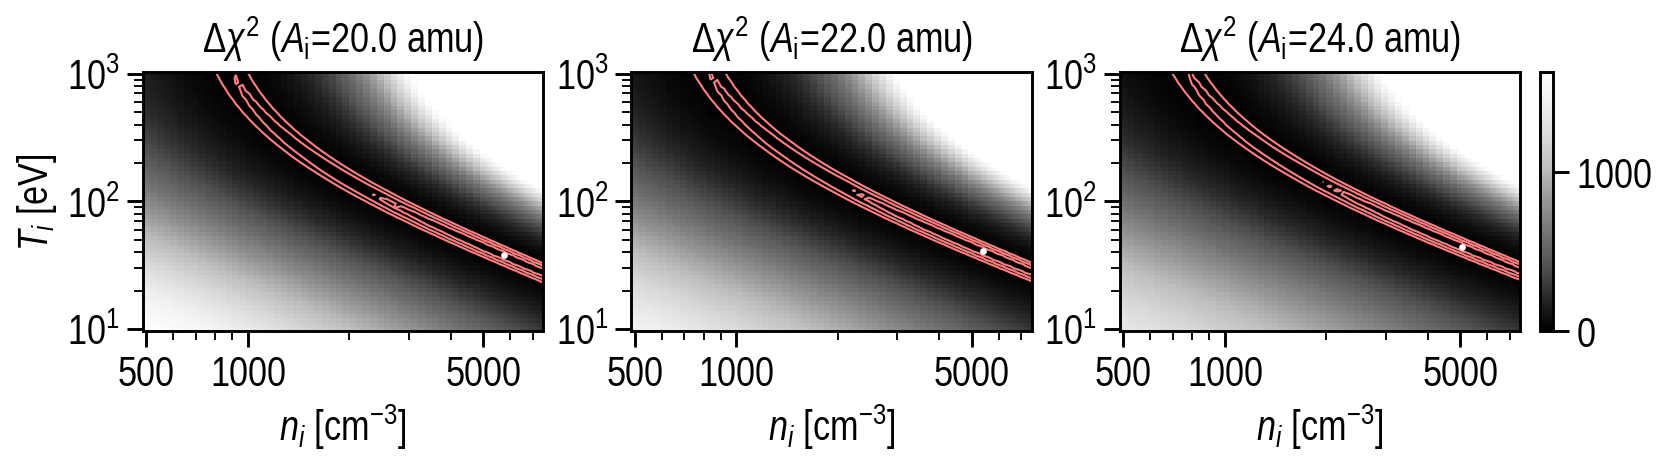

In [14]:
# 横軸 ni
fig, ax = plt.subplots(1, 3, figsize=(11, 3), dpi=150, layout='constrained')
for i in range(3):
    z_new = np.concatenate(
        [chi2_3d_a[:, i, :].T, chi2_3d_b[:, i, :].T], axis=1)
    x_new = np.concatenate([ni_3d_a[:, i, :].T, ni_3d_b[:, i, :].T], axis=1)
    y_new = np.concatenate([Ti_3d_a[:, i, :].T, Ti_3d_b[:, i, :].T], axis=1)

    z_value = z_new-np.min(z_new)
    print(z_value.shape)

    x_value = x_new
    y_value = y_new

    ax[i].set_title(
        r'$\Delta \chi^2$ ($A_{\rm i}$='+str(Ai_3d_a[0, i, 0])+' amu)')
    ax[i].set_xlabel(r'$n_i$ [cm$^{-3}$]')
    ax[0].set_ylabel(r'$T_i$ [eV]')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticks)
    cn = ax[i].contour(x_value, y_value, z_value,
                       levels=[2.30, 6.17, 11.8],
                       # levels=[21.36, 30.48, 40.29],
                       colors=UC.pink,
                       linewidths=1.0,
                       zorder=2)
    p = ax[i].pcolormesh(x_value,
                         y_value,
                         z_value,
                         cmap='Greys_r',
                         vmin=0, vmax=np.std(z_value), zorder=0.5)

    # Location of the chi2 minimum
    x_best = x_value[np.where(z_value == np.min(z_value))]
    y_best = y_value[np.where(z_value == np.min(z_value))]
    ax[i].scatter(x_best, y_best,
                  s=5, color='w', zorder=2.5)

    # Best fit parameter
    print('Best fit for A_i = '+str(Ai_3d_a[0, i, 0])+' amu')
    print('             n_i = '+str(x_best[0])+' cm-3')
    print('             T_i = '+str(y_best[0])+' eV')

fig.colorbar(p)
plt.show()

(60, 100)
Best fit for A_i = 20.0 amu
             n_i = 5755.232727579055 cm-3
             T_i = 37.6939097538836 eV
             (1) Highest n_i = 7500.000000000001 cm-3
             (1) Lowest T_i = 23.598334667821938 eV
             (2) Lowest n_i = 838.4164684055038 cm-3
             (2) Hightest T_i = 999.9999999999999 eV
(60, 100)
Best fit for A_i = 22.0 amu
             n_i = 5386.58226435447 cm-3
             T_i = 40.753929658717766 eV
             (1) Highest n_i = 7500.000000000001 cm-3
             (1) Lowest T_i = 25.514065200312878 eV
             (2) Lowest n_i = 763.2089835876166 cm-3
             (2) Hightest T_i = 999.9999999999999 eV
(60, 100)
Best fit for A_i = 24.0 amu
             n_i = 5041.545644473605 cm-3
             T_i = 44.06236427773573 eV
             (1) Highest n_i = 7500.000000000001 cm-3
             (1) Lowest T_i = 25.514065200312878 eV
             (2) Lowest n_i = 728.1742387506218 cm-3
             (2) Hightest T_i = 999.9999999999999 eV


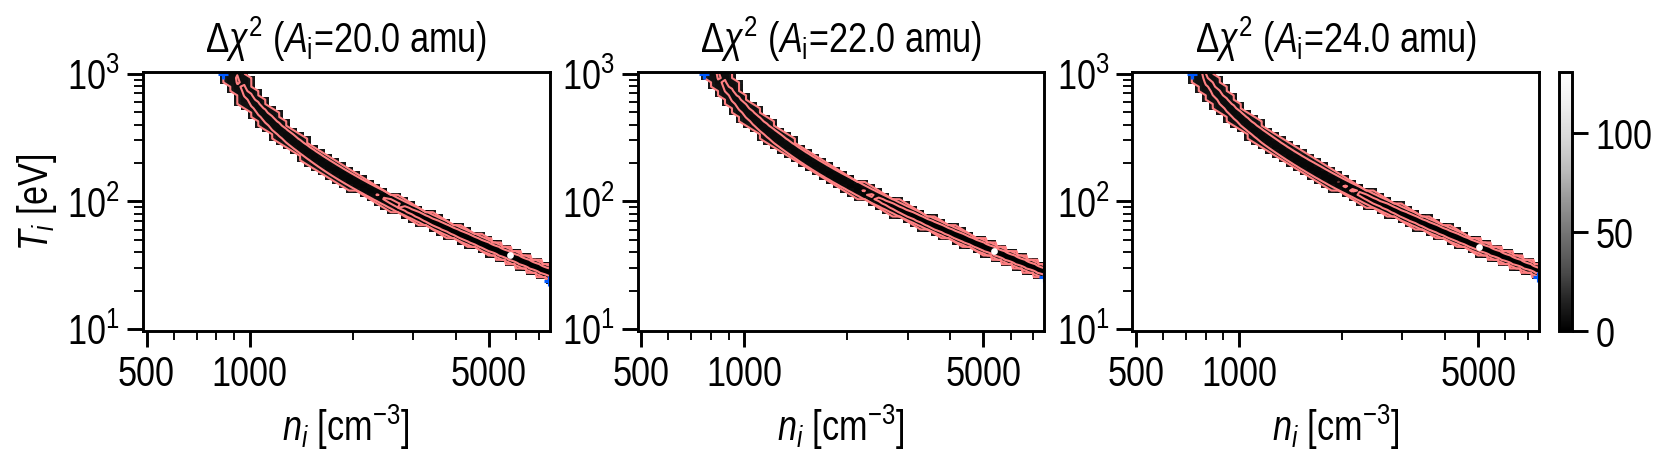

In [15]:
# 横軸 ni
fig, ax = plt.subplots(1, 3, figsize=(11, 3), dpi=150, layout='constrained')
for i in range(3):
    z_new = np.concatenate(
        [chi2_3d_a[:, i, :].T, chi2_3d_b[:, i, :].T], axis=1)
    x_new = np.concatenate([ni_3d_a[:, i, :].T, ni_3d_b[:, i, :].T], axis=1)
    y_new = np.concatenate([Ti_3d_a[:, i, :].T, Ti_3d_b[:, i, :].T], axis=1)

    z_value = z_new-np.min(z_new)
    print(z_value.shape)

    z_value = np.where(z_value < 11.8, z_value, 500)

    ax[i].set_title(
        r'$\Delta \chi^2$ ($A_{\rm i}$='+str(Ai_3d_a[0, i, 0])+' amu)')
    ax[i].set_xlabel(r'$n_i$ [cm$^{-3}$]')
    ax[0].set_ylabel(r'$T_i$ [eV]')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticks)
    cn = ax[i].contour(x_value, y_value, z_value,
                       levels=[2.30, 6.17, 11.8],
                       # levels=[21.36, 30.48, 40.29],
                       colors=UC.pink,
                       linewidths=1.0,
                       zorder=2)
    p = ax[i].pcolormesh(x_value,
                         y_value,
                         z_value,
                         cmap='Greys_r',
                         vmin=0, vmax=np.std(z_value), zorder=0.5)

    # Location of the chi2 minimum
    x_best = x_value[np.where(z_value == np.min(z_value))]
    y_best = y_value[np.where(z_value == np.min(z_value))]
    ax[i].scatter(x_best, y_best,
                  s=5, color='w', zorder=2.5)

    # Best fit parameter
    print('Best fit for A_i = '+str(Ai_3d_a[0, i, 0])+' amu')
    print('             n_i = '+str(x_best[0])+' cm-3')
    print('             T_i = '+str(y_best[0])+' eV')

    # Lowest temperature
    x_value_mask = x_value[np.where(z_value < 11.8)]
    y_value_mask = y_value[np.where(z_value < 11.8)]
    print('             (1) Highest n_i = '+str(x_value_mask.max())+' cm-3')
    print('             (1) Lowest T_i = '+str(y_value_mask.min())+' eV')
    ax[i].scatter(x_value_mask.max(),
                  y_value_mask.min(),
                  marker='+',
                  s=20, color=UC.blue, zorder=2.5)

    # Lowest temperature
    print('             (2) Lowest n_i = '+str(x_value_mask.min())+' cm-3')
    print('             (2) Hightest T_i = '+str(y_value_mask.max())+' eV')
    ax[i].scatter(x_value_mask.min(),
                  y_value_mask.max(),
                  marker='+',
                  s=20, color=UC.blue, zorder=2.5)

fig.colorbar(p)
plt.show()

Median:  2.1172151856684958e-08
5 percentile & delta:  1.3334970642628772e-08 7.837181214056187e-09
95 percentile & delta:  2.670418083115683e-08 5.532028974471872e-09
Median:  2.2051885919980878e-08
5 percentile & delta:  1.3481187932023874e-08 8.570697987957004e-09
95 percentile & delta:  2.810637329459586e-08 6.054487374614981e-09
Median:  2.2498047851350786e-08
5 percentile & delta:  1.3433331180777393e-08 9.064716670573393e-09
95 percentile & delta:  2.9466451506759535e-08 6.968403655408749e-09


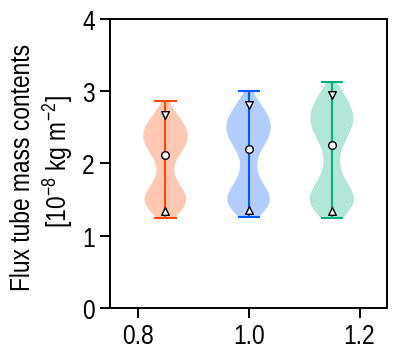

In [16]:
F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(4, 4), dpi='S')
F.initialize()
F.ax.set_xlim(0.75, 1.25)
F.ax.set_ylim(0.0, 4.0)
F.ax.set_ylabel('Flux tube mass contents \n [10$^{-8}$ kg m$^{-2}$]')

x_pos = [0.85, 1.0, 1.15]

for i in range(3):
    column_mass_2d = np.concatenate([column_mass_3d_a[:, i, :].T,
                                    column_mass_3d_b[:, i, :].T],
                                    axis=1)
    chi2_2d = np.concatenate([chi2_3d_a[:, i, :].T,
                              chi2_3d_b[:, i, :].T],
                             axis=1)
    chi2_2d = chi2_2d - np.min(chi2_2d)

    # 3-sigma area
    column_mass_2d = column_mass_2d[np.where(chi2_2d < dchi_3s)]
    chi2_2d = chi2_2d[np.where(chi2_2d < dchi_3s)]   # 一番最後に

    quartile1, medians, quartile3 = np.percentile(
        column_mass_2d, [5, 50, 95], axis=0)

    parts = F.ax.violinplot(column_mass_2d*1E+8,
                            positions=[x_pos[i]],
                            widths=0.08)
    F.ax.scatter(x_pos[i], medians*1E+8, s=30, marker='o',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)
    F.ax.scatter(x_pos[i], quartile1*1E+8, s=30, marker='^',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)
    F.ax.scatter(x_pos[i], quartile3*1E+8, s=30, marker='v',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)

    print('Median: ', medians)
    print('5 percentile & delta: ', quartile1, medians-quartile1)
    print('95 percentile & delta: ', quartile3, quartile3-medians)

(array([60., 81., 39., 20., 19., 33., 61., 63., 54., 24.]),
 array([1.24622790e-08, 1.43490320e-08, 1.62357850e-08, 1.81225380e-08,
        2.00092910e-08, 2.18960441e-08, 2.37827971e-08, 2.56695501e-08,
        2.75563031e-08, 2.94430561e-08, 3.13298091e-08]),
 <BarContainer object of 10 artists>)

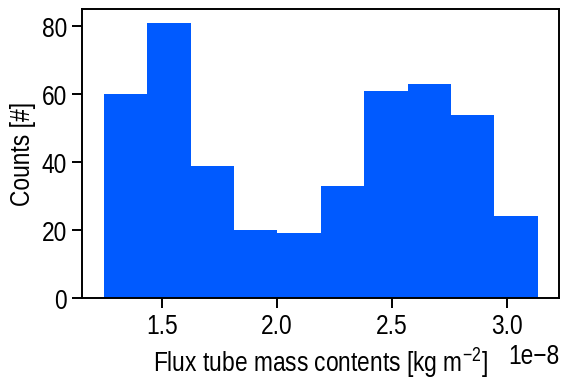

In [17]:
F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(6, 4), dpi='S')
F.initialize()

F.ax.set_xlabel(r'Flux tube mass contents [kg m$^{-2}$]')
F.ax.set_ylabel(r'Counts [#]')
F.ax.hist(column_mass_2d, color=UC.blue, bins='auto')

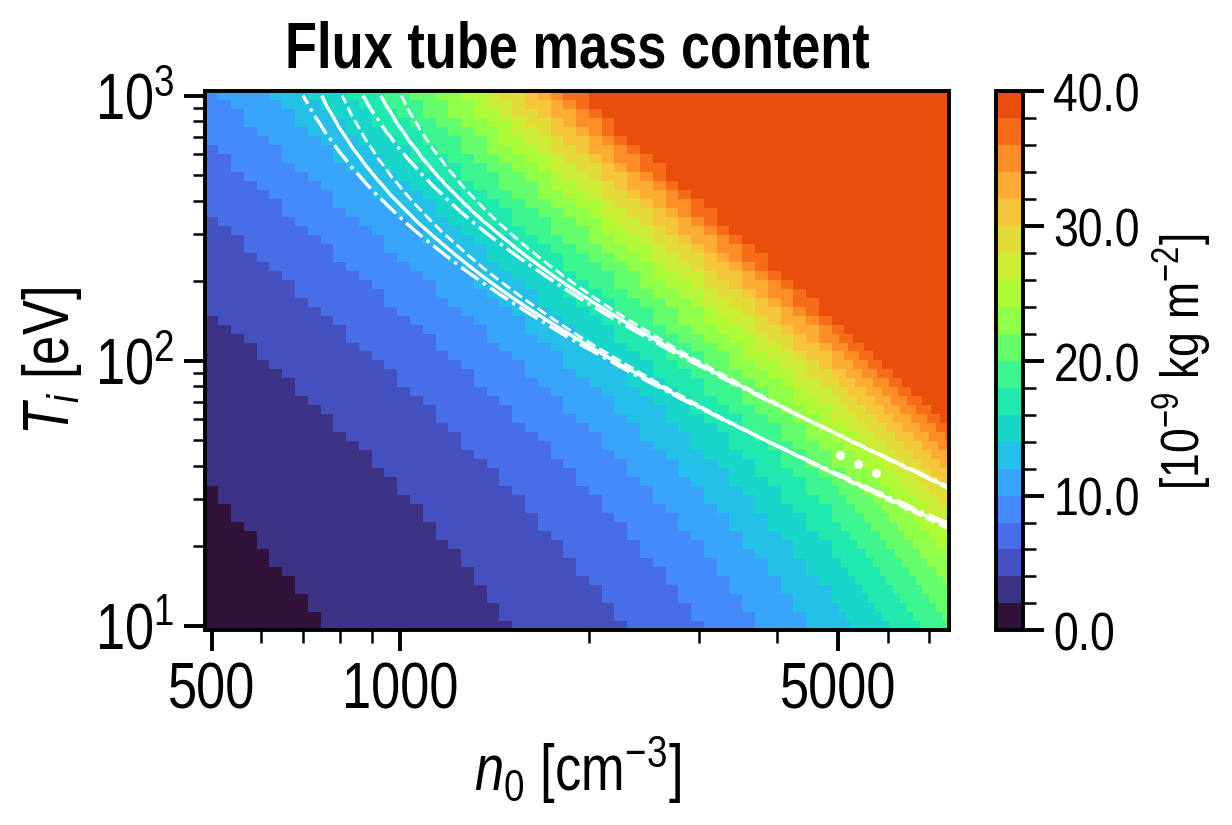

In [18]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'
F.set_default()

fig, ax = plt.subplots(figsize=(6., 3.5),
                       dpi=200)
fig.subplots_adjust(hspace=0.8)

F.fig, F.ax = fig, ax

#
#
# THIRD AXIS
i = 1
z_value_99 = np.concatenate([column_mass_3d_a[:, i, :].T,
                             column_mass_3d_b[:, i, :].T],
                            axis=1)
z_value_99 = z_value_99*1E+9
x_value = np.concatenate([ni_3d_a[:, i, :].T, ni_3d_b[:, i, :].T], axis=1)
y_value = np.concatenate([Ti_3d_a[:, i, :].T, Ti_3d_b[:, i, :].T], axis=1)

ax.set_title('Flux tube mass content', weight='bold')
ax.set_xlabel(r'$n_0$ [cm$^{-3}$]')
ax.set_ylabel(r'$T_i$ [eV]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
linestyles = ['--', '-', '-.']
linewidth = [1.0, 1.2, 1.2]
for i in range(3):
    column_mass_2d = np.concatenate([column_mass_3d_a[:, i, :].T,
                                    column_mass_3d_b[:, i, :].T],
                                    axis=1)
    chi2_2d = np.concatenate([chi2_3d_a[:, i, :].T,
                              chi2_3d_b[:, i, :].T],
                             axis=1)
    chi2_2d = chi2_2d - np.min(chi2_2d)

    z_value = chi2_2d

    cn = ax.contour(x_value, y_value, z_value,
                    levels=[11.8],
                    # levels=[21.36, 30.48, 40.29],
                    colors='w',
                    linewidths=linewidth[i],
                    linestyles=linestyles[i],
                    zorder=2)

    # Location of the chi2 minimum
    x_best = x_value[np.where(z_value == np.min(z_value))]
    y_best = y_value[np.where(z_value == np.min(z_value))]
    ax.scatter(x_best, y_best,
               s=5, color='w', zorder=2.5)

cmap_turbo = plt.get_cmap('turbo')
N_color = 20
dN = int(256/N_color-1)
color_list = []
for i in range(N_color):
    color_list += [cmap_turbo(i*dN)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=40)

p = ax.pcolormesh(x_value,
                  y_value,
                  z_value_99,
                  cmap=cmap,
                  norm=norm,
                  zorder=0.5)

# Setting for color bar
cmap_turbo = plt.get_cmap('turbo')
cmap_turbo(0)
color_list = [cmap_turbo(0), cmap_turbo(63), cmap_turbo(127), cmap_turbo(195)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=1)

cax = fig.colorbar(p, ax=ax)
cax.ax.set_yticks(np.linspace(0, 40, 5))
cax.ax.set_yticklabels(np.linspace(0, 40, 5), fontsize=F.fontsize*0.85)
cax.ax.yaxis.set_minor_locator(ptick.AutoMinorLocator(5))
cax.ax.set_ylabel(r'[$10^{-9}$ kg m$^{-2}$]', fontsize=F.fontsize*0.85)

"""F.textbox(ax_idx=0, x=2200, y=200,
          text='PJ3', fontsize=F.fontsize*0.55,
          horizontalalignment='center',
          facealpha=0., edgecolor='none')
F.textbox(ax_idx=0, x=2500, y=35,
          text='PJ19', fontsize=F.fontsize*0.55,
          horizontalalignment='center',
          facealpha=0., edgecolor='none')
F.textbox(ax_idx=0, x=800, y=200,
          text='PJ28S', fontsize=F.fontsize*0.55,
          horizontalalignment='center',
          facealpha=0., edgecolor='none')"""

plt.show()